In [ ]:
import sys
sys.path.insert(0, '..')

import sympy as sy
import numpy as np
from src.dynamical_system import DynamicalSystem
import matplotlib.pyplot as plt
import itertools

In [2]:
system = DynamicalSystem("Lorenz")
system.show()

<IPython.core.display.Math object>

In [3]:
print(system._parameters)
beta, sigma, rho = system._parameters

[beta, sigma, rho]


In [4]:
system._jacobian.doit()

Matrix([
[ -sigma, sigma,     0],
[rho - z,    -1,    -x],
[      y,     x, -beta]])

In [5]:
Time = np.linspace(0, 20, 1000)
time_averaged_jacobian = system.get_time_averaged_jacobian([Time[0], Time[-1]], [0,1,1], {rho: 28, sigma: 10, beta: 8/3}, t_eval=Time)

In [20]:
eigenvalues = np.array([np.linalg.eigvals(time_averaged_jacobian[:,:,t]) for t, _ in enumerate(Time)])

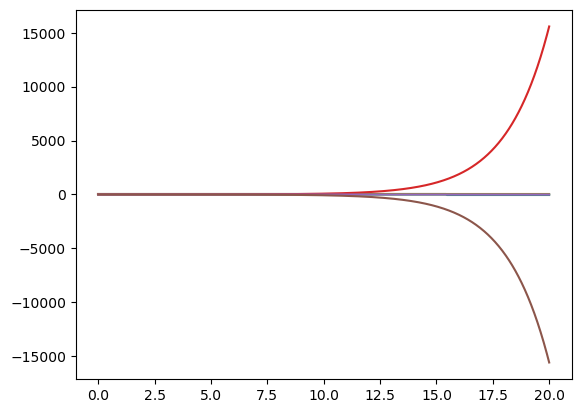

In [28]:
for i in range(3):
    plt.plot(Time, np.real(eigenvalues[:,i]))
    plt.plot(Time, np.imag(eigenvalues[:,i]))

plt.show()